In [9]:
import torch 
import torchvision 
from torchvision import transforms, datasets

train = datasets.MNIST("",train = True, download = True,
                       transform = transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("",train = False, download = True,
                       transform = transforms.Compose([transforms.ToTensor()]))

trainset = torch.utils.data.DataLoader(train, batch_size = 10, shuffle = True)
testset = torch.utils.data.DataLoader(test, batch_size = 10, shuffle = True)



In [10]:
# Now we will do some Neural Netowrks :D

import torch.nn as nn
import torch.nn.functional as F


In [11]:
class Net(nn.Module): # remember this is inheritance
    def __init__(self):
        # many people forget this LOL
        super().__init__()
        #define the fully connected later (fc = full connected)
        # 784 = 28 * 28 size of the flatened image, 64 is the output we just chose it so
        self.fc1 = nn.Linear(784, 64) 
        # each later should contain input with the same size as the output of the previous one !
        self.fc2 = nn.Linear(64, 64) 
        self.fc3 = nn.Linear(64, 64) 
        self.fc4 = nn.Linear(64, 10) 
    # And this is called Feed Forward NN because of the previous point
    
    def forward(self, x):
        # relu = rectified linear which is our activation function here
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        
        return F.log_softmax(x, dim = 1)
        
        
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [12]:
# Let's pass some data
X = torch.rand((28,28))
# we should change the demensions such that they would work with torch 
X = X.view(-1, 28*28) # we can put also 1 instead of 1
output = net(X)
output

tensor([[-2.1879, -2.3063, -2.2774, -2.4064, -2.2441, -2.3160, -2.2817, -2.3081,
         -2.3312, -2.3849]], grad_fn=<LogSoftmaxBackward>)

In [13]:
# The optimizer job is to adjust weights such that it lowers the loss

# The 4th video starts here
import torch.optim as optim
# net.parameters are the adjustable parameters in our net, lr = learning rate 
optimizer = optim.Adam(net.parameters(), lr = 0.001)

EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainset:
        # data is a batch of feature sets and labels
        X, y = data # X is the something like the pixel values (like gray scale) and y is the label or the class
        net.zero_grad()
        output = net(X.view(-1, 28 * 28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)
        



tensor(0.9112, grad_fn=<NllLossBackward>)
tensor(0.0961, grad_fn=<NllLossBackward>)
tensor(0.0029, grad_fn=<NllLossBackward>)


In [15]:
correct = 0
total = 0 

with torch.no_grad():
    for data in trainset:
        X, y = data
        output = net(X.view(-1,784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
            
            
print("Accurancy : ", round(correct/total, 3))


Accurancy :  0.98


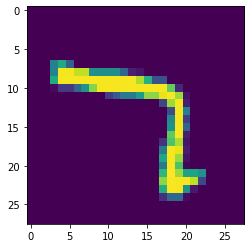

In [16]:
import matplotlib.pyplot as plt
plt.imshow(X[1].view(28,28))
plt.show()


In [19]:
print(torch.argmax(net(X[1].view(-1,784))[0]))

tensor(7, grad_fn=<NotImplemented>)
